f(x) = sin(x) + cos(x)


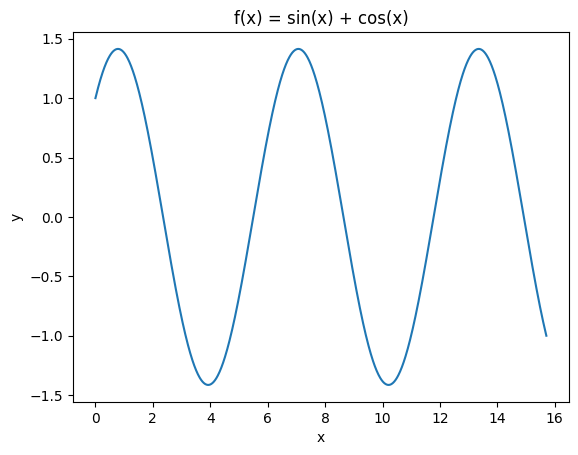

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

# create a function f(x) = sin(x) + cos(x)
x_sym = sp.symbols('x')
f_sym = sp.sin(x_sym) + sp.cos(x_sym)

print(f"f(x) = {f_sym}")

# using seaborn, plot the function f
f = sp.lambdify(x_sym, f_sym, 'numpy')
x = np.linspace(0, 5*np.pi, 1000)

# calculate y by evaluating f(x), make it general
y = f(x)

df = {'x':x, 'y':y}
sns.lineplot(x='x', y='y', data=df)
# add title
plt.title('f(x) = sin(x) + cos(x)')
plt.show()

In [2]:
def taylor_approx(f_sym, x_sym, a, n):
    """
    f_sym: sympy function
    x_sym: symbol
    a: point to expand around
    n: number of terms in the series
    """
    # create a variable to store the taylor series
    F_sym = 0
    for i in range(n + 1):
        # calculate the ith derivative of f_sym
        dk_sym = sp.diff(f_sym, x_sym, i) # f^(i)(x)
        dk = sp.lambdify(x_sym, dk_sym, 'numpy')
        Fk_sym = (dk(a) / sp.factorial(i)) * (x_sym - a)**i
        F_sym += Fk_sym
    # simplify the expression
    F_sym = sp.simplify(F_sym)    
    return F_sym

# example
a = 1
n = 2
f_sym = x_sym**2 + x_sym + 1
# f_sym = sp.cos(x_sym**2 + x_sym + 1)
F_sym = taylor_approx(f_sym, x_sym, a, n)
print(F_sym)


x**2 + x + 1


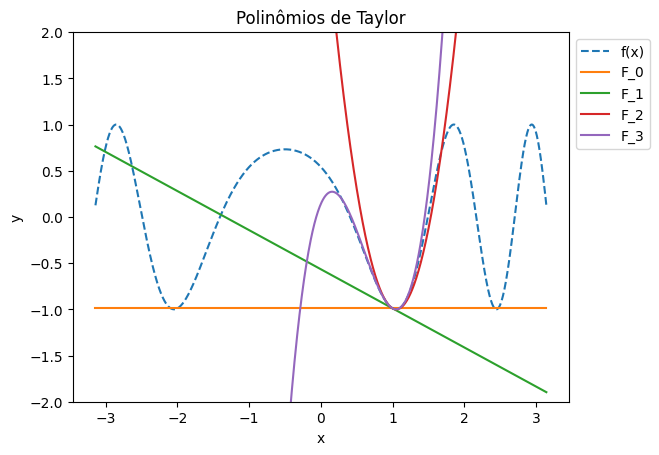

In [3]:
f_sym = sp.cos(x_sym**2 + x_sym + 1)
x = np.linspace(-np.pi, np.pi, 1000)
# calculate y by evaluating f(x), make it general
f = sp.lambdify(x_sym, f_sym, 'numpy')
y = f(x)
df = {'x':x, 'y':y}

# plot using dashed
fig, ax = plt.subplots()
sns.lineplot(x='x', y='y', data=df, label='f(x)', linestyle='dashed')
for n in range(4):
    F_sym = taylor_approx(f_sym, x_sym, a, n)
    # convert F_sym to a function
    F = sp.lambdify(x_sym, F_sym, 'numpy')
    y = F(x)
    df = {'x':x, 'y':y}
    sns.lineplot(x='x', y='y', data=df, label=f'F_{n}')

# set y-axis limits
plt.ylim(-2, 2)

# set legend outside of the plot (upper left)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(f"Polinômios de Taylor")
plt.show()

# save figure
fig.savefig('../slides/CC0323_01/taylor_approx.png', dpi=300, bbox_inches='tight');

# Taylor's Remainder

In [4]:
def taylor_rem(f_sym, x_sym, a, n):
    """
    f_sym: sympy function
    x_sym: symbol
    a: point to expand around
    n: number of terms in the series
    """
    # create a variable to store the taylor series
    R_sym = f_sym - taylor_approx(f_sym, x_sym, a, n)
    return R_sym

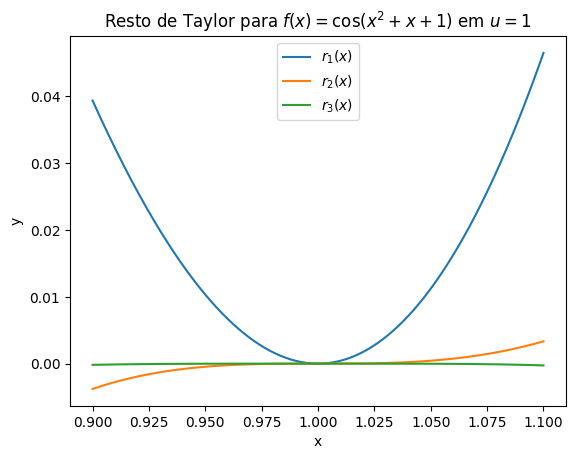

In [13]:
f_sym = sp.cos(x_sym**2 + x_sym + 1)
eps = 1/10
x = np.linspace(1-eps, 1+eps, 1000)
# calculate y by evaluating f(x), make it general
f = sp.lambdify(x_sym, f_sym, 'numpy')
y = f(x)
df = {'x':x, 'y':y}

# plot using dashed
fig, ax = plt.subplots()
for n in range(1,4):
    R_sym = taylor_rem(f_sym, x_sym, a, n)
    # convert to functions    
    R = sp.lambdify(x_sym, R_sym, 'numpy')
    y = R(x)
    df = {'x':x, 'y':y}
    sns.lineplot(x='x', y='y', data=df, label=f'$r_{n}(x)$')

# set y-axis limits
# plt.ylim(-2, 2)

# set legend outside of the plot (upper left)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1))
plt.title(f"Resto de Taylor para $f(x)=\cos(x^2+x+1)$ em $u={a}$")
plt.show()

# save figure
fig.savefig('../slides/CC0323_01/taylor_rem.png', dpi=300, bbox_inches='tight');